# Bayesovská lineární regrese


In [1]:
import numpy as np
import matplotlib.pylab as plt
np.set_printoptions(precision=2)
import scipy.io as sio

Nejprve si nagenerujeme data dle modelu
$$
\mathbf{y} = X\boldsymbol{\beta}+\mathbf{e}
$$

<ipython-input-2-a1067caaf722>:29: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(X),interpolation='none')


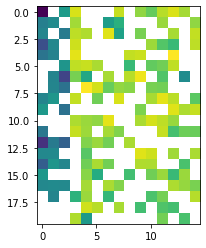

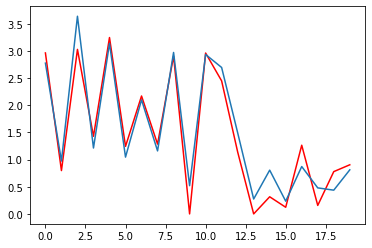

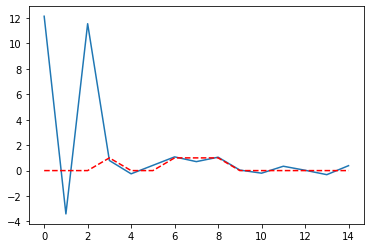

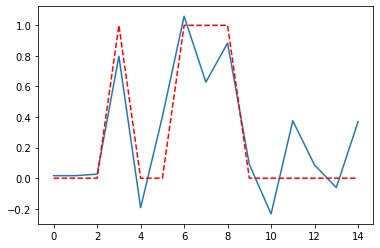

In [2]:
p = 20 ### pocet mereni
n = 15 # pocet regresnich koeficientu

if 0:
    # matice regresnich koeficientu
    X = np.random.randn(p,n)
    ind = X < 0
    X[ind] = 0
    # tento vektor budeme odhadovat
    beta_true = np.array([0,0,0,1,0,0,1,1,1,0,0,0,0,0,0])

    # chceme spatnou podminenost
    ind = [0,1,2]
    X[:,ind] = X[:,ind]/100
    
    # chceme sum
    y = np.transpose(X@beta_true + 0.3*np.random.randn(p)) ### sila sumu je volitelna
    y.shape = (p,1)
    ind2 = y<0
    y[ind2] = 0
    #print(y)
else:
    # data pouzita v prednasce
    X = sio.loadmat("lin_reg_data.mat")["X"]
    y = sio.loadmat("lin_reg_data.mat")["y"]
    beta_true = sio.loadmat("lin_reg_data.mat")["beta_true"]
    #print(y)

plt.imshow(np.log(X),interpolation='none')

plt.figure()
plt.plot(X@beta_true,color='red')
plt.plot(y)

beta_ols = np.zeros(n)
beta_ols = np.linalg.inv(X.T@X)@X.T@y

plt.figure()
plt.plot(beta_ols)
plt.plot(beta_true,color='red',linestyle='dashed')

alpha = 1e-1 ### regularizacni koeficient
beta_tich = np.zeros(n)
beta_tich = np.linalg.inv(X.T@X + alpha*np.eye(n))@X.T@y

plt.figure()
plt.plot(beta_tich)
plt.plot(beta_true,color='red',linestyle='dashed')

## Bayesovská lineární regrese (ridge regression)
Nejprve si připomeneme odvození z přednášky.

Definovali jsme si apriorní model jako:

$$
f(\mathbf{y}|\beta,\omega)=\mathcal{N}\left(X\beta,\omega^{-1}I_{p}\right)=(2\pi)^{-\frac{p}{2}}|\omega^{-1}I_{p}|^{-\frac{1}{2}}\exp\left( -\frac{1}{2}(\mathbf{y}-X\beta)^T(\omega^{-1}I_{p})^{-1}(\mathbf{y}-X\beta) \right),\\
f(\beta)= \mathcal{N}\left(\mathbf{0},I_{n}\right)=\left(2\pi\right)^{-\frac{n}{2}}\left|I_{n}\right|^{-\frac{1}{2}}\exp\left(-\frac{1}{2}\beta'I_{n}\beta\right),\\
f(\omega)= \mathcal{G}\left(c_{0},d_{0}\right)=\frac{c_{0}^{d_{0}}}{\Gamma(c_{0})}\omega^{c_{0}-1}\exp\left(-d_{0}\omega\right)
$$

Na tento model chceme aplikovat variační Bayesovu (VB) metodu, která nám určuje tvar aposteriorních rozdělení parametrů jako:
$$
\tilde{f}\left(\theta_{i}|\mathbf{y}\right)\propto\exp\left[E_{\tilde{f}(\theta_{\backslash i}|\mathbf{y})}\left(\ln f(\theta_{1},\theta_{2},\dots,\theta_{q},\mathbf{y})\right)\right].
$$

Tzn. náš logaritmus sdružené věrohodnosti vyjádříme jako
$$
\ln f(\mathbf{y},\beta,\omega) = \ln|\omega^{-1}I_{p}|^{-\frac{1}{2}} - \frac{1}{2}\omega(\mathbf{y}-X\beta)^T(\mathbf{y}-X\beta) - \frac{1}{2}\beta^T\beta + (c_{0}-1)\ln\omega-d_{0}\omega + const.
$$
a aplikujeme VB větu, čímž dostáváme aposteriorna
$$
\tilde{f}(\beta|\mathbf{y}) \propto \exp\left(-\frac{1}{2}\widehat{\omega}(-2)\mathbf{y}^{T}X\beta-\frac{1}{2}\widehat{\omega}\beta^{T}X^{T}X\beta-\frac{1}{2}(\beta^{T}I_n\beta)\right)\\
\tilde{f}(\omega|\mathbf{y}) \propto \exp\left( (c_{0}+\frac{p}{2}-1)\ln\omega-(d_{0}+\frac{1}{2}(\mathbf{y}\mathbf{y}^{T}-2\mathbf{y}^{T}X\widehat{\beta}+\widehat{\beta^{T}X^{T}X\beta})\omega \right)
$$

Tím se dostáváme k soustavě implicitních rovnic (odvozeno na přednášce) pro aposteriorní rozdělení $\tilde{f}(\boldsymbol{\beta}|\mathbf{y})=\mathcal{N}(\mu_\boldsymbol{\beta},\Sigma_\boldsymbol{\beta})$ a $\tilde{f}(\omega|\mathbf{y})=\mathcal{G}(c,d)$ s tvarovacími parametry:
\begin{align}
\Sigma_{\boldsymbol{\beta}}= & \left(\widehat{\omega}X^{T}X+I_{n}\right)^{-1}\\
\mu_{\boldsymbol{\beta}}= & \Sigma_{\boldsymbol{\beta}}\widehat{\omega}X^{T}\mathbf{y}\\
c= & c_{0}+\frac{p}{2}\\
d= & d_{0}+\frac{1}{2}\left(\mathbf{y}^{T}\mathbf{y}-2\mathbf{y}^{T}X\widehat{\boldsymbol{\beta}}+\text{trace}[\widehat{\boldsymbol{\beta}\boldsymbol{\beta}^{T}}X^{T}X]\right)
\end{align}
...a příslušné momenty:
\begin{align}
\widehat{\boldsymbol{\beta}} &= \mu_{\boldsymbol{\beta}}\\
\widehat{\boldsymbol{\beta}\boldsymbol{\beta}^T} &= \mu_{\boldsymbol{\beta}}\mu_{\boldsymbol{\beta}}^T + \Sigma_{\boldsymbol{\beta}}\\
\widehat{\omega} &= c/d
\end{align}

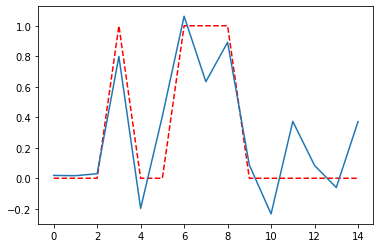

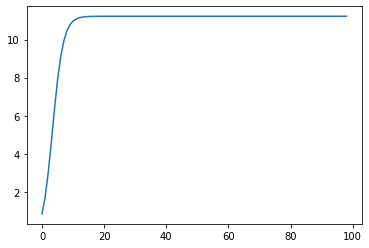

In [12]:
# citlivost na apriorni parametry
c0 = 1e-10
d0 = 1e-10

# trasovani vyvoje regularizacniho parametru
hat_omega = 1/np.ndarray.max(X)
hist_omega = []

for i in range(1,100): # pocet interaci
    #---------------------------------------------
    # tvarovaci parametry a momenty \beta
    #---------------------------------------------
    si_beta = np.linalg.inv(hat_omega*X.T@X + np.eye(n))
    mu_beta = si_beta@(hat_omega*X.T@y)
    hat_beta = mu_beta
    hat_bbt = mu_beta@mu_beta.T + si_beta
    
    #---------------------------------------------
    # tvarovaci parametry a momenty \omega
    #---------------------------------------------
    c = c0 + p/2
    d = d0 + 1/2*(y.T@y) - y.T@X@hat_beta + 1/2*np.trace(hat_bbt@X.T@X)
    hat_omega = c/d
    hist_omega = np.append(hist_omega,hat_omega)

# vysledek ulozime a vytiskneme
beta_VBridge = hat_beta
    
plt.plot(beta_true,color='red',linestyle='dashed')
plt.plot(beta_VBridge)

plt.figure()
plt.plot(hist_omega)